# #######Porosity estimation Regression using seismic attributes#######

# Import libraries

In [230]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
import tensorflow as tf

In [231]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [232]:
dataset=pd.read_csv(r'D:\ML\Ahmad codes\Porosity_Estimation_ML.csv')

# EDA

In [233]:
dataset.head()

,WellName,MD,Por,envlope,DomFreq,Cosine_Phase,Chaos
0,F3-02,31,0.3757,128.51,22.86,0.36,0.58
1,F3-02,32,0.3756,151.75,30.54,0.19,0.57
2,F3-02,33,0.3755,175.00,38.22,0.02,0.56
3,F3-02,34,0.3755,195.07,43.05,-0.09,0.54
4,F3-02,35,0.3755,204.98,38.74,-0.01,0.51


In [234]:
dataset.tail()

,WellName,MD,Por,envlope,DomFreq,Cosine_Phase,Chaos
3879,F3-04,1855,0.3006,13119.51,25.58,0.29,0.01
3880,F3-04,1856,0.2968,13197.38,25.47,0.23,0.01
3881,F3-04,1857,0.2894,13339.15,25.51,0.17,0.01
3882,F3-04,1858,0.2889,13480.79,25.56,0.10,0.01
3883,F3-04,1859,0.2887,13761.04,25.65,-0.02,0.01


In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3884 entries, 0 to 3883
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WellName      3884 non-null   object 
 1   MD            3884 non-null   int64  
 2   Por           3884 non-null   float64
 3   envlope       3884 non-null   float64
 4   DomFreq       3884 non-null   float64
 5   Cosine_Phase  3884 non-null   float64
 6   Chaos         3884 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 212.5+ KB


In [236]:
dataset.describe()

,MD,Por,envlope,DomFreq,Cosine_Phase,Chaos
count,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000,3884.000000
mean,1010.078527,0.320465,2351.437356,34.970610,0.002340,0.158010
std,566.855074,0.059451,1819.149380,11.967235,0.632666,0.157464
min,31.000000,-0.188500,15.080000,3.370000,-1.000000,0.000000
25%,521.000000,0.293900,1132.085000,26.187500,-0.600000,0.040000
50%,1006.500000,0.329250,1865.735000,35.485000,0.000000,0.100000
75%,1492.000000,0.360700,3099.560000,44.702500,0.610000,0.230000
max,2095.000000,0.452400,13761.040000,67.750000,0.990000,1.000000


In [237]:
dataset.shape

(3884, 7)

In [238]:
dataset.columns

Index(['WellName', 'MD', 'Por', 'envlope', 'DomFreq', 'Cosine_Phase', 'Chaos'], dtype='object')

In [239]:
dataset.dtypes

WellName         object
MD                int64
Por             float64
envlope         float64
DomFreq         float64
Cosine_Phase    float64
Chaos           float64
dtype: object

# Checking and handling null values

In [240]:
dataset.isnull().sum()

WellName        0
MD              0
Por             0
envlope         0
DomFreq         0
Cosine_Phase    0
Chaos           0
dtype: int64

In [241]:
#deleting columns of 'MD', 'Well name

In [242]:
dataset2=dataset.drop(['MD','WellName'], axis = 1)

In [243]:
dataset2.head()

,Por,envlope,DomFreq,Cosine_Phase,Chaos
0,0.3757,128.51,22.86,0.36,0.58
1,0.3756,151.75,30.54,0.19,0.57
2,0.3755,175.00,38.22,0.02,0.56
3,0.3755,195.07,43.05,-0.09,0.54
4,0.3755,204.98,38.74,-0.01,0.51


# Plot

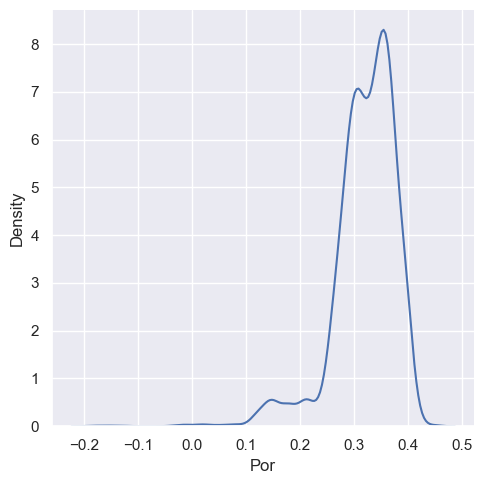

In [244]:
sns.displot(dataset2, x="Por",kind="kde")

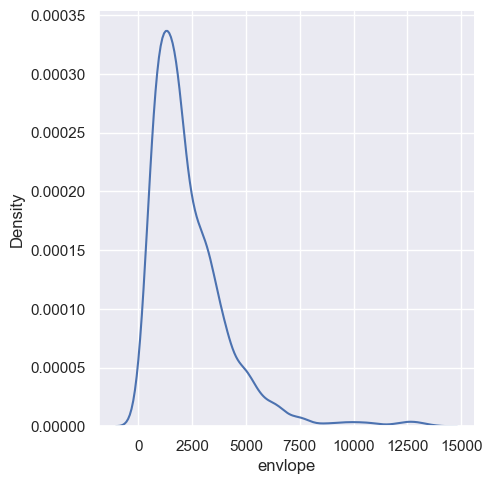

In [245]:
sns.displot(dataset2, x="envlope",kind="kde")

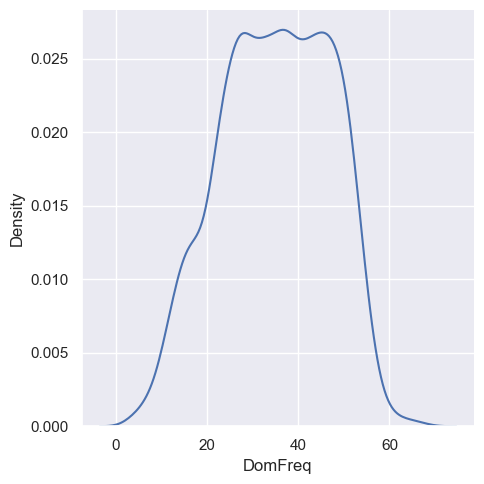

In [246]:
sns.displot(dataset2, x="DomFreq",kind="kde")

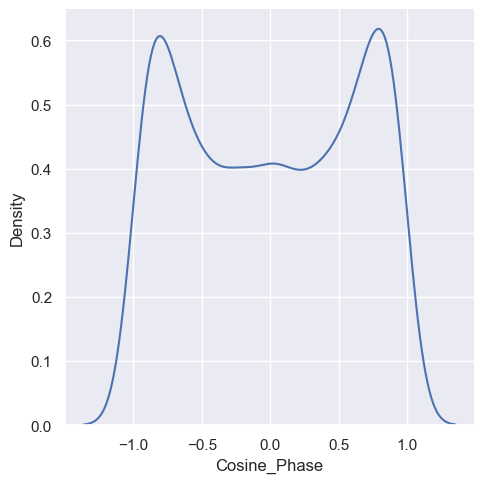

In [247]:
sns.displot(dataset2, x="Cosine_Phase",kind="kde")

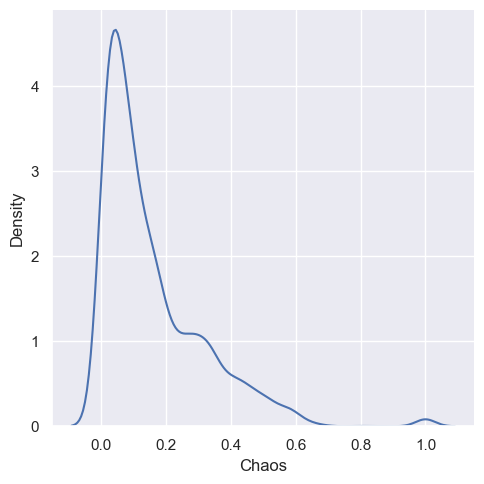

In [248]:
sns.displot(dataset2, x="Chaos",kind="kde")

In [249]:
corr=dataset2.corr()

In [250]:
corr

,Por,envlope,DomFreq,Cosine_Phase,Chaos
Por,1.000000,-0.050198,-0.136952,-0.037831,-0.033670
envlope,-0.050198,1.000000,-0.040957,0.018156,-0.421080
DomFreq,-0.136952,-0.040957,1.000000,-0.020130,-0.385010
Cosine_Phase,-0.037831,0.018156,-0.020130,1.000000,0.108045
Chaos,-0.033670,-0.421080,-0.385010,0.108045,1.000000


<AxesSubplot:>

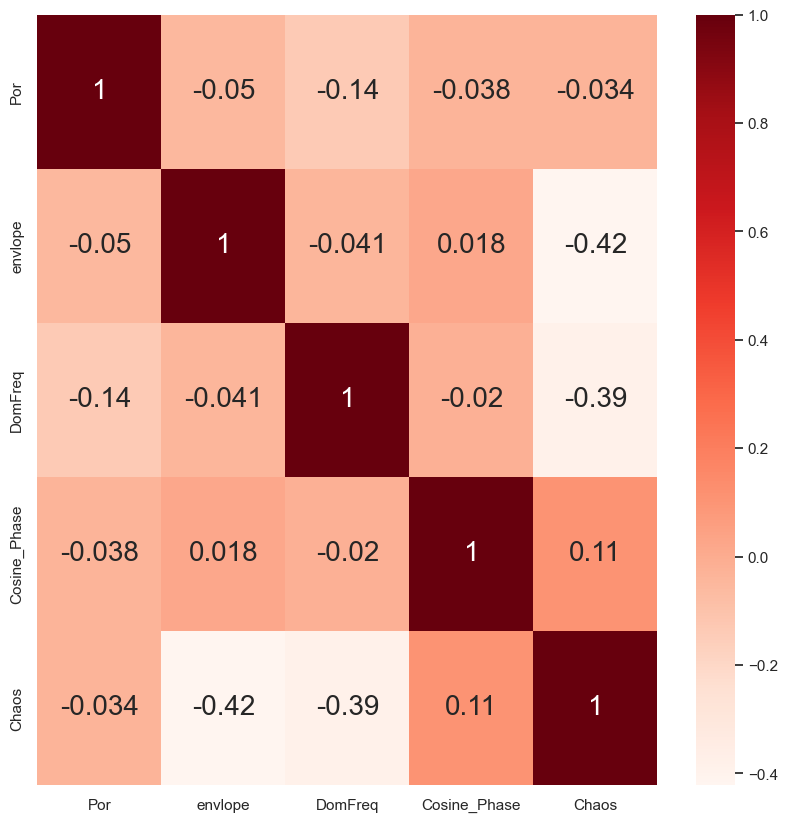

In [251]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':20},cmap='Reds')

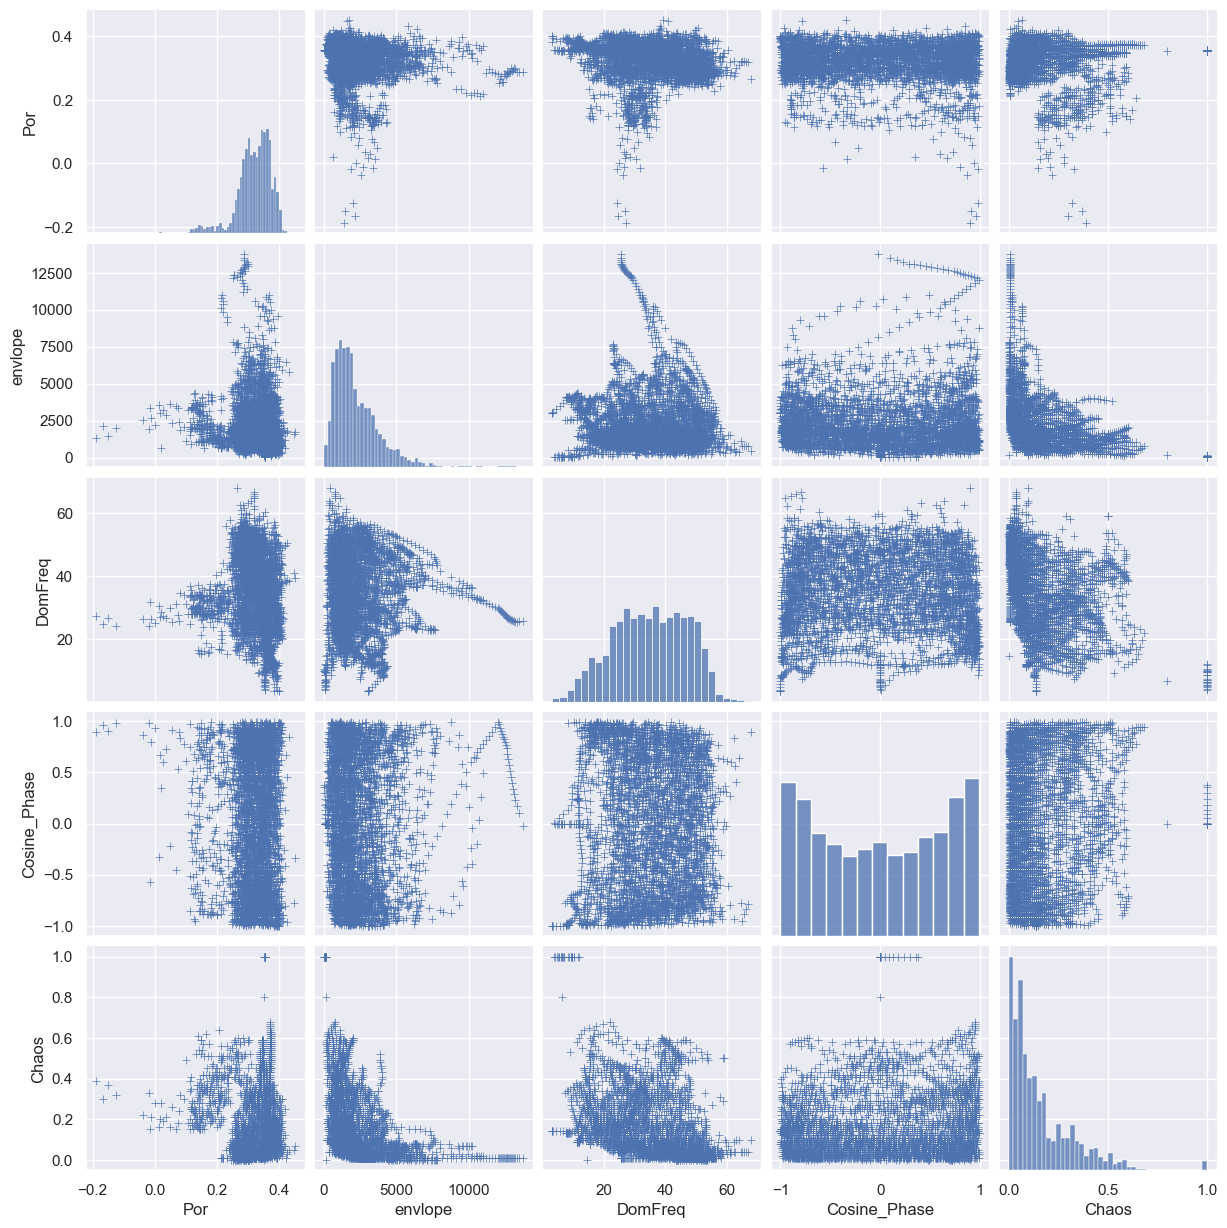

In [252]:
sns.pairplot(dataset2,markers='+');plt.show()

# Train Test splite

In [253]:
# Target column for regression is Por
x=dataset2.iloc[:,1:5].values
y=dataset2.iloc[:,0].values

In [254]:
print(x)

[[ 1.285100e+02  2.286000e+01  3.600000e-01  5.800000e-01]
 [ 1.517500e+02  3.054000e+01  1.900000e-01  5.700000e-01]
 [ 1.750000e+02  3.822000e+01  2.000000e-02  5.600000e-01]
 ...
 [ 1.333915e+04  2.551000e+01  1.700000e-01  1.000000e-02]
 [ 1.348079e+04  2.556000e+01  1.000000e-01  1.000000e-02]
 [ 1.376104e+04  2.565000e+01 -2.000000e-02  1.000000e-02]]


In [255]:
print(y)

[0.3757 0.3756 0.3755 ... 0.2894 0.2889 0.2887]


In [256]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# feature scaling

In [257]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Regression Model by linear regression & QC 

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [259]:
regressor_LR=LinearRegression()
regressor_LR.fit(x_train,y_train)

LinearRegression()

In [260]:
y_pred_LR=regressor_LR.predict(x_test)

<AxesSubplot:ylabel='Count'>

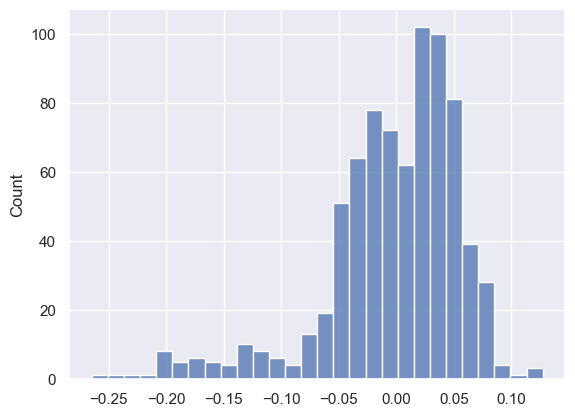

In [261]:
sns.histplot(y_test-y_pred_LR)

Text(0, 0.5, 'y_pred_LR')

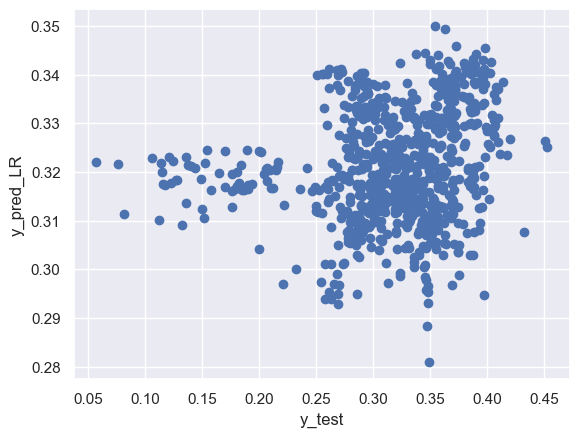

In [262]:
plt.plot(y_test,y_pred_LR,'o')
plt.xlabel('y_test')
plt.ylabel('y_pred_LR')

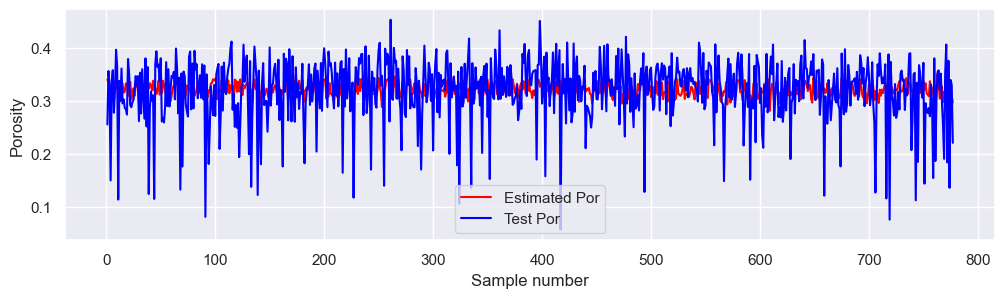

In [263]:
plt.figure(figsize=(12,3))
x_axis=np.linspace(1, np.size(y_test), num=np.size(y_test))
plt.plot(x_axis,y_pred_LR,'red', label='Estimated Por')
plt.plot(x_axis,y_test,'blue', label='Test Por')
plt.xlabel('Sample number')
plt.ylabel('Porosity')
plt.legend();

In [264]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_LR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_LR))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR)))
from sklearn.metrics import r2_score
r2=np.sqrt(r2_score(y_test,y_pred_LR))
print("R2 =",r2)

Mean Absolute Error: 0.04328917398249729
Mean Squared Error: 0.0034335151105943725
Root Mean Squared Error: 0.05859620389235443
R2 = 0.20839899250148888


# Regression Model by XGboost & QC 

In [265]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [266]:
Regmodel_XGB=xgb.XGBRegressor()
Regmodel_XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [267]:
y_pred_XGB=Regmodel_XGB.predict(x_test)

<AxesSubplot:ylabel='Count'>

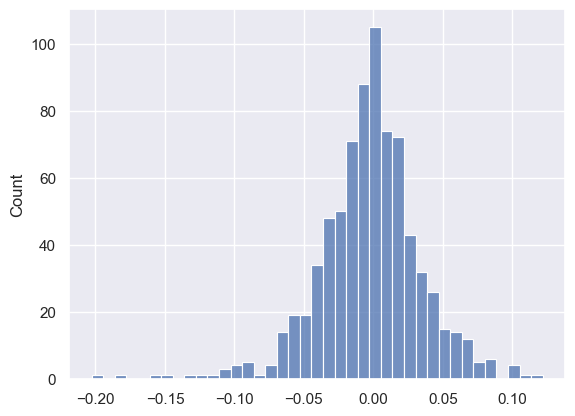

In [268]:
sns.histplot(y_test-y_pred_XGB)

Text(0, 0.5, 'y_pred_XGB')

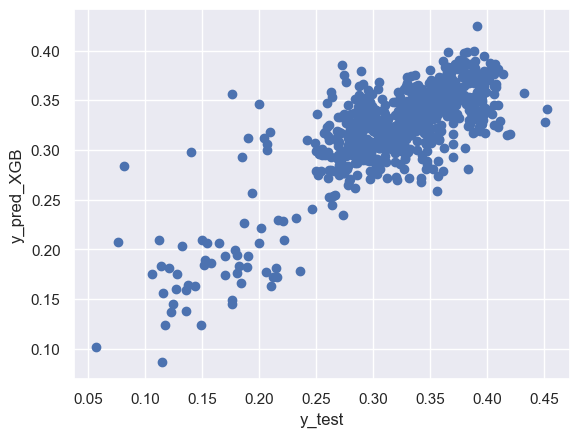

In [269]:
plt.plot(y_test,y_pred_XGB,'o')
plt.xlabel('y_test')
plt.ylabel('y_pred_XGB')

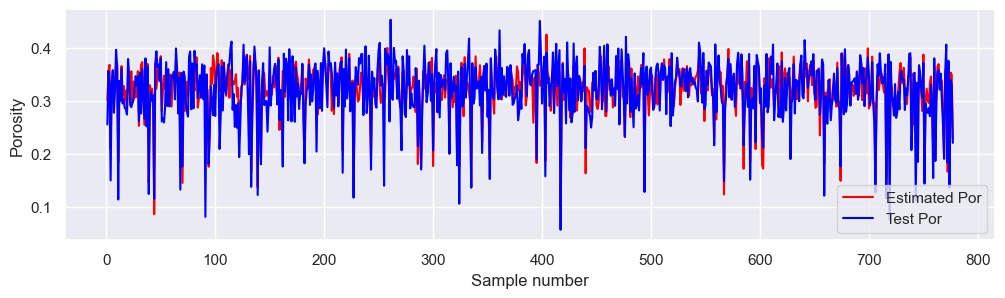

In [270]:
plt.figure(figsize=(12,3))
x_axis=np.linspace(1, np.size(y_test), num=np.size(y_test))
plt.plot(x_axis,y_pred_XGB,'red', label='Estimated Por')
plt.plot(x_axis,y_test,'blue', label='Test Por')
plt.xlabel('Sample number')
plt.ylabel('Porosity')
plt.legend();

In [271]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_XGB))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_XGB))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB)))
from sklearn.metrics import r2_score
r2=np.sqrt(r2_score(y_test,y_pred_XGB))
print("R2 =",r2)

Mean Absolute Error: 0.026536159807267184
Mean Squared Error: 0.0013506023998637272
Root Mean Squared Error: 0.036750542851279454
R2 = 0.7897626870614558


# Regression Model by KNN

In [272]:
from sklearn.neighbors import KNeighborsRegressor
regressor_KNN = KNeighborsRegressor(n_neighbors=5)
regressor_KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [273]:
y_pred_KNN=regressor_KNN.predict(x_test)

<AxesSubplot:ylabel='Count'>

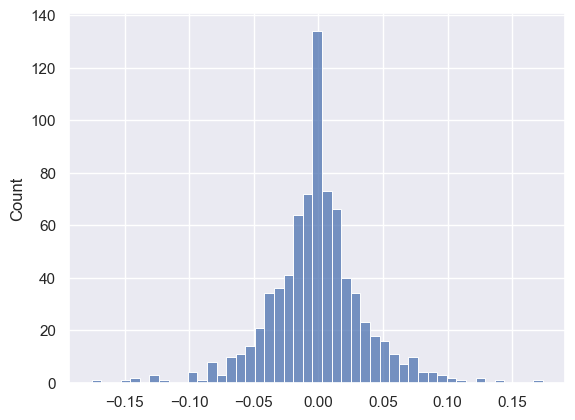

In [274]:
sns.histplot(y_test-y_pred_KNN)

Text(0, 0.5, 'y_pred_KNN')

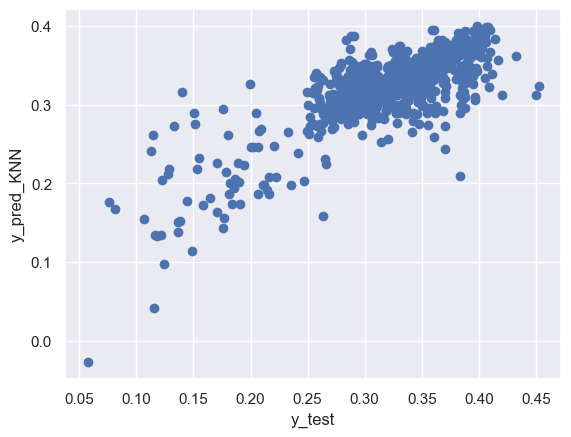

In [275]:
plt.plot(y_test,y_pred_KNN,'o')
plt.xlabel('y_test')
plt.ylabel('y_pred_KNN')

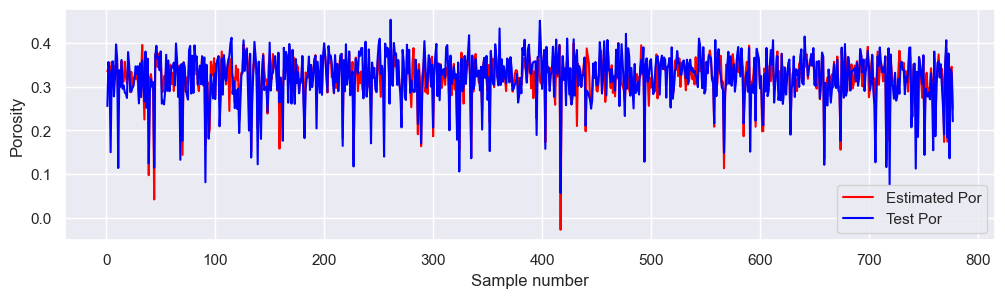

In [276]:
plt.figure(figsize=(12,3))
x_axis=np.linspace(1, np.size(y_test), num=np.size(y_test))
plt.plot(x_axis,y_pred_KNN,'red', label='Estimated Por')
plt.plot(x_axis,y_test,'blue', label='Test Por')
plt.xlabel('Sample number')
plt.ylabel('Porosity')
plt.legend();

In [277]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_KNN))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_KNN))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_KNN)))
from sklearn.metrics import r2_score
r2=np.sqrt(r2_score(y_test,y_pred_KNN))
print("R2 =",r2)

Mean Absolute Error: 0.025570990990990992
Mean Squared Error: 0.0013515397400257402
Root Mean Squared Error: 0.03676329337839226
R2 = 0.7895973410157818


# Regression Model by RandomForest & QC 

In [278]:
from sklearn.ensemble import RandomForestRegressor
rfReg=RandomForestRegressor()
rfReg.fit(x_train,y_train)

RandomForestRegressor()

In [279]:
y_pred_rfReg=rfReg.predict(x_test)

<AxesSubplot:ylabel='Count'>

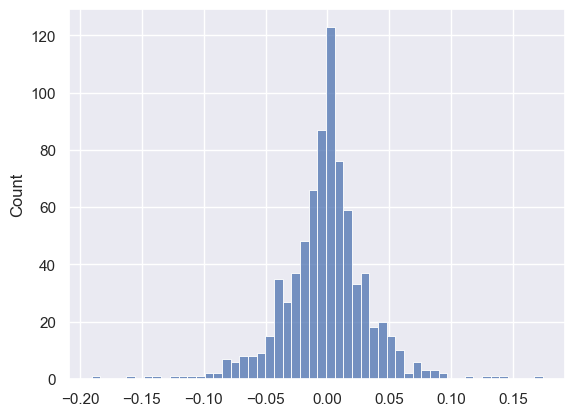

In [280]:
sns.histplot(y_test-y_pred_rfReg)

Text(0, 0.5, 'y_pred_rfReg')

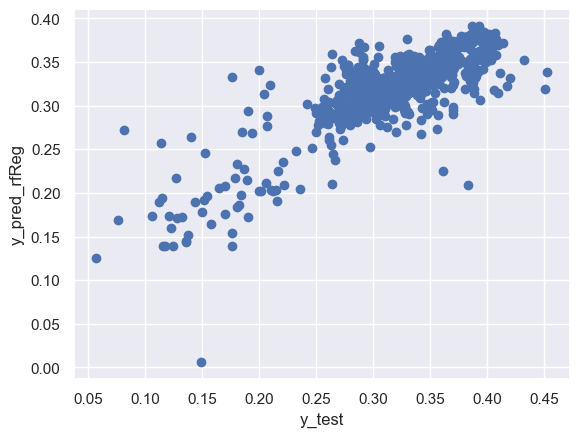

In [281]:
plt.plot(y_test,y_pred_rfReg,'o')
plt.xlabel('y_test')
plt.ylabel('y_pred_rfReg')

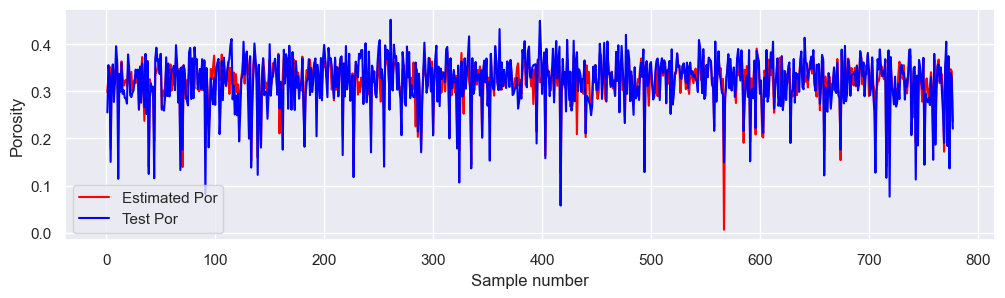

In [282]:
plt.figure(figsize=(12,3))
x_axis=np.linspace(1, np.size(y_test), num=np.size(y_test))
plt.plot(x_axis,y_pred_rfReg,'red', label='Estimated Por')
plt.plot(x_axis,y_test,'blue', label='Test Por')
plt.xlabel('Sample number')
plt.ylabel('Porosity')
plt.legend();

In [283]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_rfReg))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_rfReg))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfReg)))
from sklearn.metrics import r2_score
r2=np.sqrt(r2_score(y_test,y_pred_rfReg))
print("R2 =",r2)

Mean Absolute Error: 0.024007622479622487
Mean Squared Error: 0.0012120813685273847
Root Mean Squared Error: 0.0348149589763852
R2 = 0.8138284589814425


# Regression Model by SVR & QC 

In [284]:
from sklearn.svm import SVR
Regressor_SVR=SVR()

In [285]:
Regressor_SVR.fit(x_train,y_train)

SVR()

In [286]:
y_pred_SVR=Regressor_SVR.predict(x_test)

<AxesSubplot:ylabel='Count'>

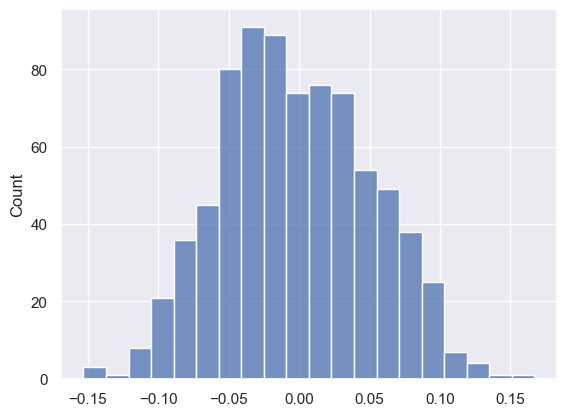

In [287]:
sns.histplot(y_test-y_pred_SVR)

Text(0, 0.5, 'y_pred_rfReg')

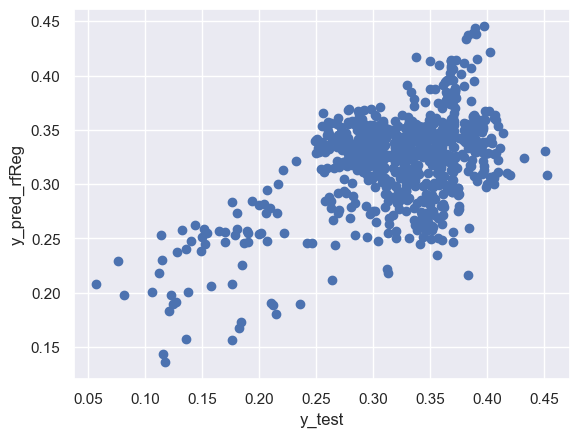

In [288]:
plt.plot(y_test,y_pred_SVR,'o')
plt.xlabel('y_test')
plt.ylabel('y_pred_rfReg')

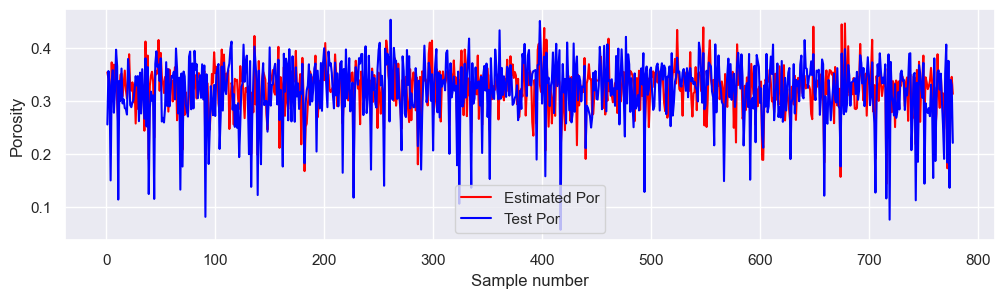

In [289]:
plt.figure(figsize=(12,3))
x_axis=np.linspace(1, np.size(y_test), num=np.size(y_test))
plt.plot(x_axis,y_pred_SVR,'red', label='Estimated Por')
plt.plot(x_axis,y_test,'blue', label='Test Por')
plt.xlabel('Sample number')
plt.ylabel('Porosity')
plt.legend();

In [290]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_SVR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_SVR))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR)))
from sklearn.metrics import r2_score
r2=np.sqrt(r2_score(y_test,y_pred_SVR))
print("R2 =",r2)

Mean Absolute Error: 0.0436573240704669
Mean Squared Error: 0.002781334321627854
Root Mean Squared Error: 0.052738357213965754
R2 = 0.4744747546593567


# Select XGBoost as best method
# Parameter test for XGBoost using Grid search

In [291]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'min_child_weight': [1, 5, 10],
    'max_depth': range (2, 10, 1),
    'gamma': [0.5, 1, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [292]:
parameters = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1,2, 5],
    'subsample': [0.6, 0.8, 1],
    'learning_rate': [0.1,  0.05, 0.01]
}

In [293]:
grid_search=GridSearchCV(estimator=Regmodel_XGB,
                        param_grid=parameters,
                        cv=10,
                        n_jobs=-1)

In [294]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estima

In [295]:
best_parameters=grid_search.best_params_
print("Best parameters:",best_parameters)

Best parameters: {'gamma': 0.5, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.8}


# Applying the best algorithm on unseen data

# Read Unseen data

In [296]:
dataset_Unseen=pd.read_csv(r'D:\ML\Ahmad codes\PorosityEstimation_ML_Unseen.csv')

In [297]:
dataset_Unseen.head()

,X,Y,Env,Frequency,Cosine_phase,Chaos
0,615622.09,6081332.80,4693.80,37.31,0.74,0.01
1,615647.08,6081333.50,4086.40,36.79,0.79,0.01
2,615672.07,6081334.19,4116.56,35.55,0.81,0.02
3,615697.06,6081334.89,3722.15,34.06,0.83,0.02
4,615722.05,6081335.59,3284.62,31.40,0.83,0.03


In [298]:
dataset_Unseen.shape

(10201, 6)

In [299]:
x=dataset_Unseen.iloc[:,0].values
y=dataset_Unseen.iloc[:,1].values
Cosine_phase=dataset_Unseen.iloc[:,4].values
Frequency=dataset_Unseen.iloc[:,3].values
Env=dataset_Unseen.iloc[:,2].values
Chaos=dataset_Unseen.iloc[:,5].values

Text(0, 0.5, 'Y')

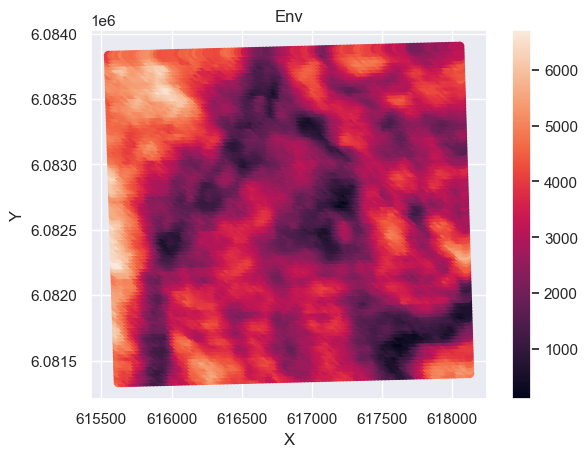

In [300]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Env)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Env')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

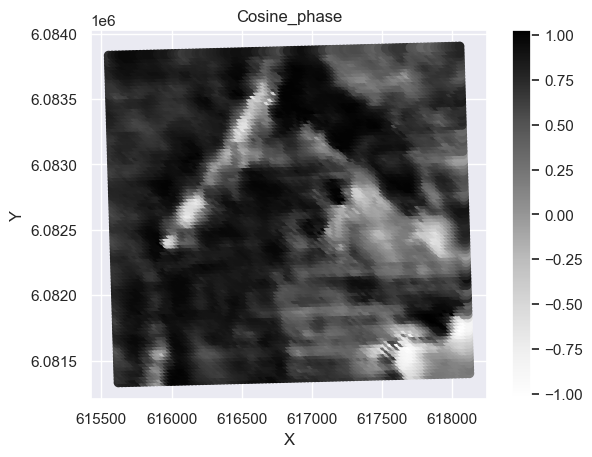

In [301]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Cosine_phase, cmap=plt.cm.Greys)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Cosine_phase')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

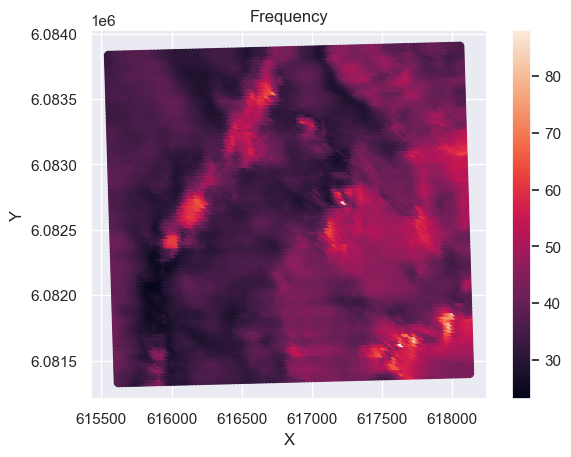

In [302]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Frequency)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Frequency')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

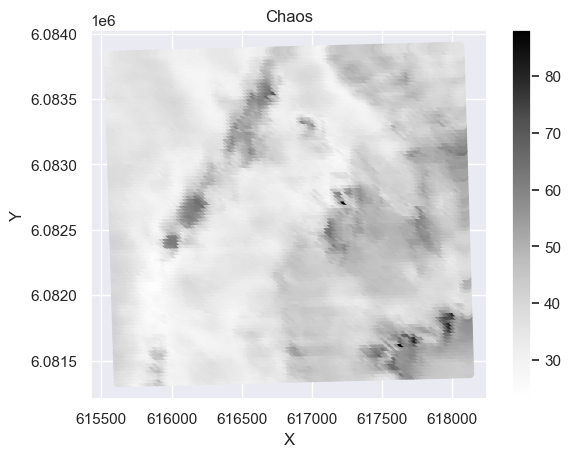

In [303]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Frequency, cmap=plt.cm.Greys)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Chaos')
plt.xlabel('X')
plt.ylabel('Y')

In [304]:
#deleting columns of 'MD', 'Well name

dataset_Unseen2=dataset_Unseen.drop(['X','Y'], axis = 1)

dataset_Unseen2.head()

,Env,Frequency,Cosine_phase,Chaos
0,4693.80,37.31,0.74,0.01
1,4086.40,36.79,0.79,0.01
2,4116.56,35.55,0.81,0.02
3,3722.15,34.06,0.83,0.02
4,3284.62,31.40,0.83,0.03


In [305]:
dataset_Unseen2.isnull().sum()

Env             0
Frequency       0
Cosine_phase    0
Chaos           0
dtype: int64

In [306]:
x_unseen=dataset_Unseen2.iloc[:,:].values

In [307]:
print(x_unseen)

[[4.69380e+03 3.73100e+01 7.40000e-01 1.00000e-02]
 [4.08640e+03 3.67900e+01 7.90000e-01 1.00000e-02]
 [4.11656e+03 3.55500e+01 8.10000e-01 2.00000e-02]
 ...
 [3.01089e+03 3.67500e+01 6.90000e-01 1.00000e-02]
 [3.07731e+03 3.66500e+01 7.30000e-01 1.00000e-02]
 [3.10037e+03 3.59500e+01 7.70000e-01 1.00000e-02]]


In [308]:
x_unseen=sc.transform(x_unseen)

In [309]:
y_pred_XGB_unseen=Regmodel_XGB.predict(x_unseen)

In [310]:
print(y_pred_XGB_unseen)

[0.32645577 0.31588063 0.29145437 ... 0.30749306 0.2932154  0.28786978]


Text(0, 0.5, 'Y')

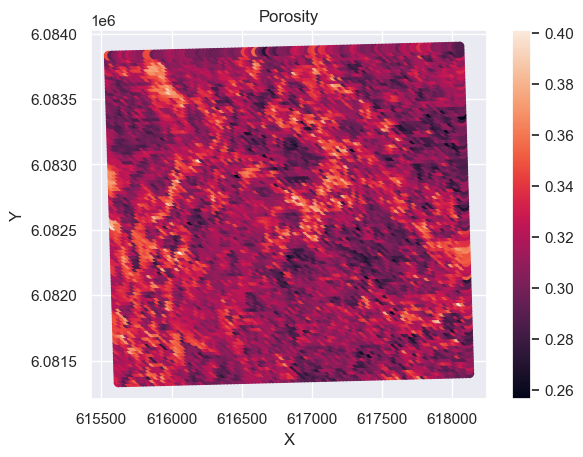

In [311]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=y_pred_XGB_unseen)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Porosity')
plt.xlabel('X')
plt.ylabel('Y')

In [312]:
# convert numpy ndarray to dataframe
Por_y= pd.DataFrame(y_pred_XGB_unseen, columns = ['Por'])
Por_y.head()

,Por
0,0.326456
1,0.315881
2,0.291454
3,0.337137
4,0.338652


In [313]:
Por_y.shape

(10201, 1)

In [314]:
# Combining dataframes
# Place the DataFrames side by side
Final_Result = pd.concat([dataset_Unseen, Por_y], axis=1)
Final_Result.head()

,X,Y,Env,Frequency,Cosine_phase,Chaos,Por
0,615622.09,6081332.80,4693.80,37.31,0.74,0.01,0.326456
1,615647.08,6081333.50,4086.40,36.79,0.79,0.01,0.315881
2,615672.07,6081334.19,4116.56,35.55,0.81,0.02,0.291454
3,615697.06,6081334.89,3722.15,34.06,0.83,0.02,0.337137
4,615722.05,6081335.59,3284.62,31.40,0.83,0.03,0.338652


In [315]:
Final_Result.to_csv(r'D:\ML\Ahmad codes\PorosityEstimation_ML_Unseen_FinalResult_RegressionPor.csv')